#Iteracion 3, apredizaje supervisado
#GitHub: https://github.com/damesaa201710054010/deep_clustering_and_digital_contents_prediction.git
Implementacion de tecnicas de ML sobre un dataset

- Federico Jaramillo
- Daniel Mesa
- 15 09 2020

#Objetivo
Para esta iteracion el objetivo principal es identificar las caracteristicas y descriptores de un dataset para posteriormente implementar sobre el modelos de aprendizaje supervisado que sean factibles segun el analisis.

#Caractetizacion y diseño en el producto

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#libreria para graficas interactivas
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Ciencia de los Datos e ingenieria de descriptres y caracteristicas


In [ ]:
from google.colab import files
files.upload()

In [ ]:
#Importamos el dataset para iniciar el análisis
glass = pd.read_csv("glass.csv")

Los primeros 5 datos del dataset

In [ ]:
print(glass.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


Los tipos de datos que encontramos



In [ ]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

Los tipos de vidrio presentes en este dataset, vemos que el tipo 4 o ventana de vehiculo no procesado

In [ ]:
pd.unique(glass['Type'])

array([1, 2, 3, 5, 6, 7])

Vemos que tenemos en total 214 datos

In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Vemos que para la mayoria de datos no tenemos mucha dispersion ya que el valor de desviación estandar es menor que dos. Es importante notar la disperción de RI que es muy baja, y ya que esta variable representa el indice de refracción esto nos dice que mayoria de los vidrios en el dataset tienen un indice parecido y no hay mucha varianza, por lo tanto se puede sacar esta variable.

Se elimina RI de las datos

In [ ]:
glasscopia = glass.drop('RI', axis=1)

5 primeros datos, con la eliminacion anterior

In [ ]:
glasscopia.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Agrupamos y contamos el total de cada tipo de vidrio

In [ ]:
cantidad_por_tipo = glasscopia.groupby('Type')['Type'].count()
print(cantidad_por_tipo)

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64


Describimos algunos datos estadisticos de los datos agrupados por el tipo

In [ ]:
cantidad_por_tipo.describe()

count     6.000000
mean     35.666667
std      29.743347
min       9.000000
25%      14.000000
50%      23.000000
75%      59.750000
max      76.000000
Name: Type, dtype: float64

Porcentajes de cada tipo en el dataset

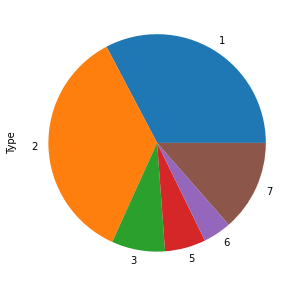

In [ ]:
plot = cantidad_por_tipo.plot.pie(y='mass', figsize=(5, 5))

Tipos de datos y presencia de nulos en el dataset, podemos observar que no tenemos presencia de datos nulos

In [ ]:
print(glass.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


En la siguiente matriz se construyo la correlacion de las variables vasados en el metodo de pearson, el cual varia de -1 a 1

In [ ]:
glasscopia.corr(method="pearson")

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Na,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


Construccion con matplot de la matriz graficamente

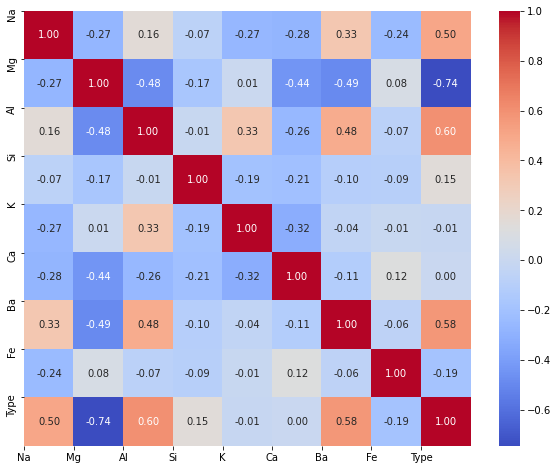

In [ ]:
corr = glasscopia.corr()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns);

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

Podemos ver que entre mas fuerte el color estan mas relacionados entre si, si se acerca a azul oscuro, estan inversamente proporcionales y si, este se acerca a rojo, las variables son directamente proporcionales. Ademas podemos ver que la gran cantidad de variables, son un factor determinante para el tipo de vidrio

Las siguientes graficas muestran la relacion que tiene el componente con la clasificacion del tipo de vidrio, podemos ver cuanto peso tiene para determinar cual es su clasificacion

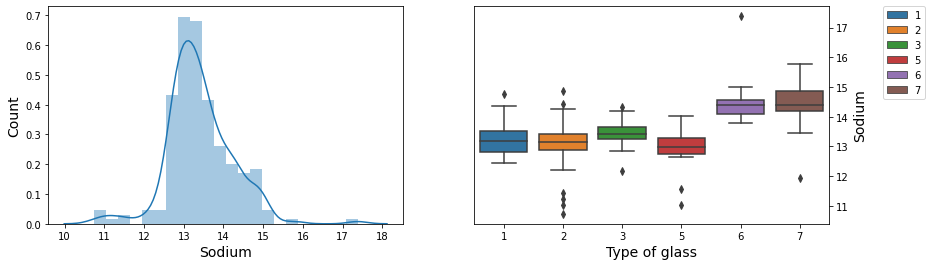

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(glasscopia['Na'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'Type', y = 'Na', data =  glasscopia, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Sodium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

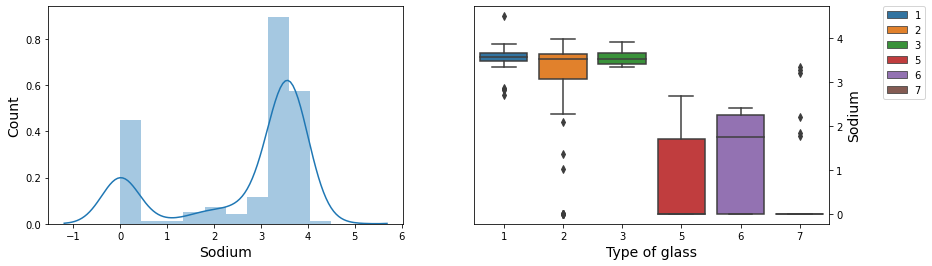

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(glasscopia['Mg'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'Type', y = 'Mg', data =  glasscopia, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Sodium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

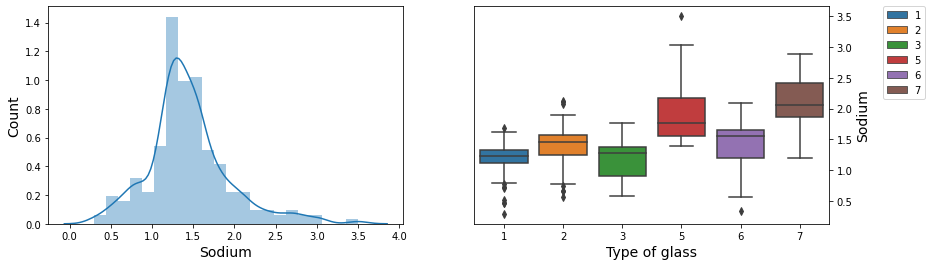

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(glasscopia['Al'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'Type', y = 'Al', data =  glasscopia, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Sodium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

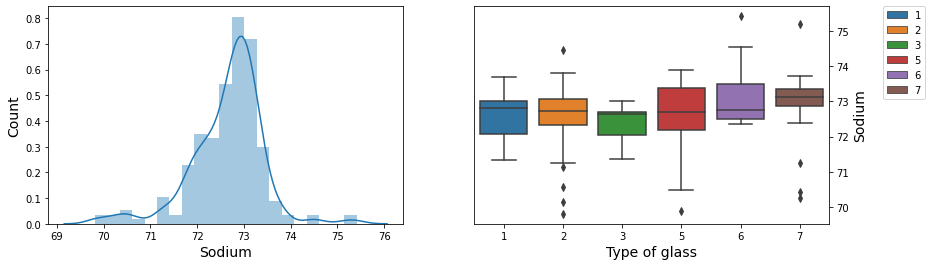

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(glasscopia['Si'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'Type', y = 'Si', data =  glasscopia, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Sodium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

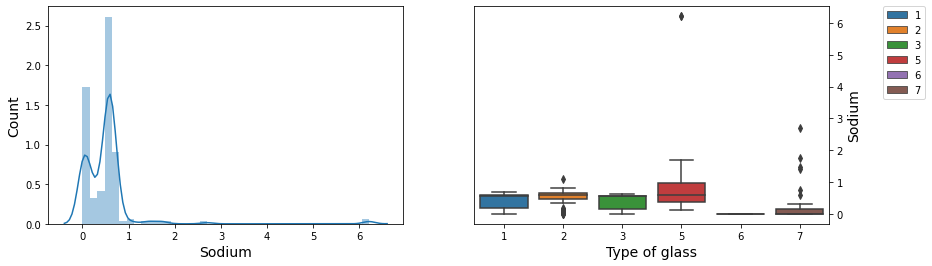

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(glasscopia['K'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'Type', y = 'K', data =  glasscopia, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Sodium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

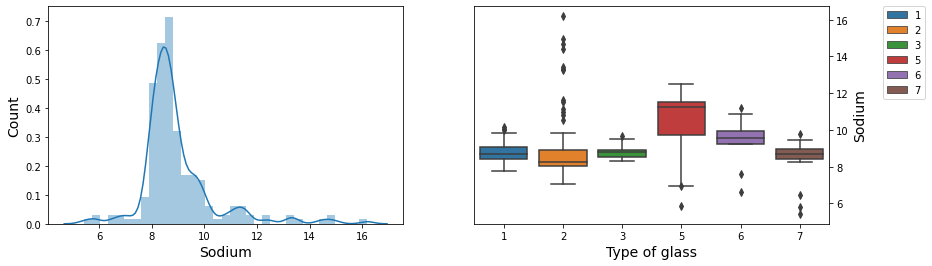

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(glasscopia['Ca'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'Type', y = 'Ca', data =  glasscopia, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Sodium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

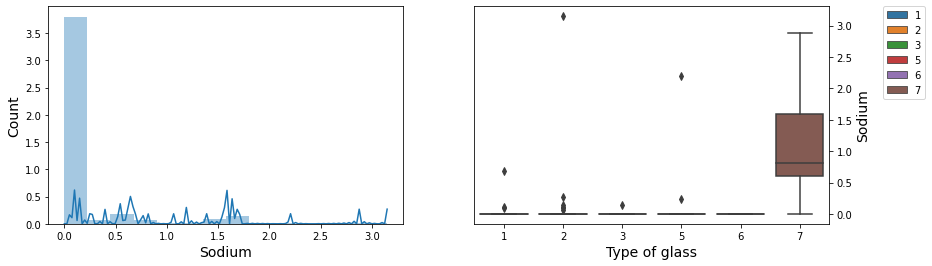

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(glasscopia['Ba'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'Type', y = 'Ba', data =  glasscopia, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Sodium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

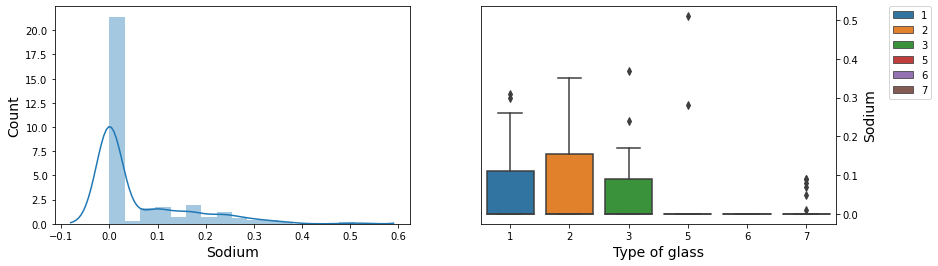

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(glasscopia['Fe'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'Type', y = 'Fe', data =  glasscopia, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Sodium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

#Prototipo y pruebas

Se importan la librerias para pre procesamiento de datos

In [ ]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Separamos los datos independientes de los dependientes

In [ ]:
X = glasscopia.drop('Type', axis = 1)
y = glasscopia['Type']

Construimos con ayuda de la libreria las variables que contienen los datos de prueba y de entrenamiento, escogimos un 25% de los datos para pruebas y el resto para el entrenamiento de los modelos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)

Transforma los datos a una forma estandarizada, por ser un dataset con pocos datos 

In [ ]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

Importamos el modelo a usar, que para este caso se utiliza una maquina de soporte de vactores por su efectividad en la clasificacion

In [ ]:
from sklearn import svm
glass_model = svm.SVC(kernel = 'rbf')
glass_model.fit(X_train, y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict = glass_model.predict(X_test)
y_predict

array([1, 7, 2, 1, 2, 2, 5, 1, 2, 2, 5, 1, 1, 2, 1, 1, 2, 7, 7, 1, 1, 2,
       7, 2, 1, 7, 1, 1, 7, 2, 2, 7, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 7, 2, 1, 2, 7, 2, 2, 2, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

In [ ]:
print('Precisión: {}'.format(glass_model.score(X_train, y_train.ravel()))

Precisión: 0.75


In [ ]:
print('Precisión: {}'.format(glass_model.score(X_test, y_test.ravel())))

Precisión: 0.8703703703703703


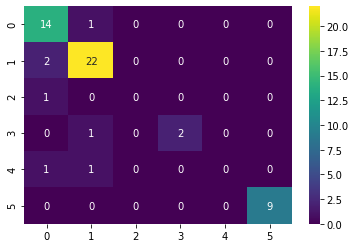

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [ ]:
print('Precisión: {}'.format(accuracy_score(y_test, y_predict)))

Precisión: 0.8703703703703703


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict, average='weighted')

0.8458943173228888

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
glass_model2 = RandomForestClassifier()
glass_model2.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict2 = glass_model2.predict(X_test)
y_predict2

array([1, 7, 2, 1, 1, 2, 5, 2, 2, 2, 5, 1, 1, 6, 1, 2, 2, 7, 7, 1, 1, 2,
       7, 2, 6, 7, 1, 1, 7, 2, 2, 7, 1, 1, 2, 2, 1, 1, 1, 2, 5, 7, 2, 2,
       2, 7, 2, 1, 2, 7, 5, 2, 2, 1])

In [ ]:
print('Precisión: {}'.format(glass_model2.score(X_train, y_train.ravel())))

Precisión: 1.0


In [ ]:
print('Precisión: {}'.format(glass_model2.score(X_test, y_test.ravel())))

Precisión: 0.8703703703703703


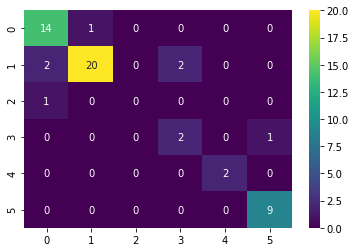

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_predict2), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [ ]:
print('Precisión: {}'.format(accuracy_score(y_test, y_predict2)))

Precisión: 0.8703703703703703


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict2, average='weighted') 

0.8647950895757914

#Analisis de los resultados


Podemos concluir que ambos metodos son buenos para el tipo de clasificacion, tanto SVM como RandomForest tienen buenos resultados de precision, podemos verlo en la matriz de confusion y en los score tenidos en cuenta